<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Segmentation%20d'une%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de la segmentation d'une image

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 448 (delta 68), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (448/448), 39.96 MiB | 11.84 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/INF8770


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture de l'image

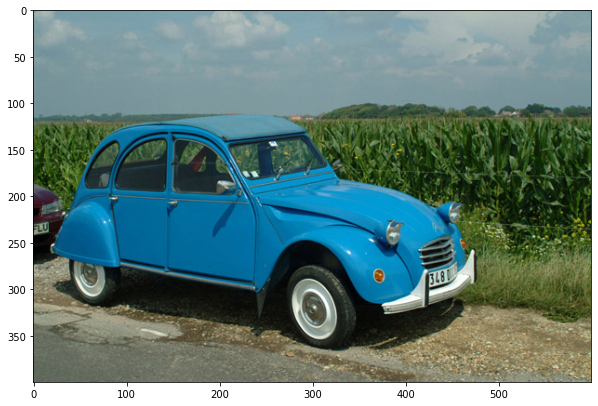

In [3]:
image = cv2.imread('RGB.jpg')
b,g,r = cv2.split(image) #OpenCV lit les images en BGR
image = cv2.merge([r,g,b])
#ou image = image[:,:,::-1]
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()

Segmentation sans tenir compte de la position dans l'image des pixels. Les groupes obtenus ne seront pas composés de pixels connectés.

[[  7 120 169]
 [138 159 159]
 [100 109  78]
 [ 28  45  25]]
[[1]
 [1]
 [1]
 ...
 [2]
 [1]
 [1]]


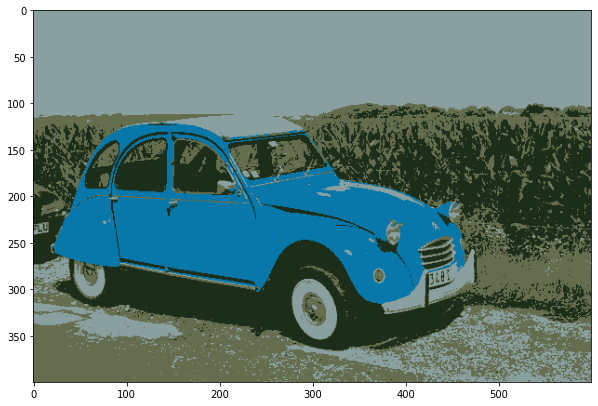

In [4]:
#Nombre de groupes
K = 4 
# Définition des critères d'arret. EPS est le déplacement des centres 
criteresArret = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 

#Créer un vecteur de vecteurs de RGB.
RGBPix = image.reshape((-1,3))
RGBPix = np.float32(RGBPix)

# Application de K-Means
ret,etiquettes,centres = cv2.kmeans(RGBPix,K,None,criteresArret,1,cv2.KMEANS_RANDOM_CENTERS)

# Affichage des groupes en utilisant le RGB du centre.
centres = np.uint8(centres)
print(centres)
print(etiquettes)

res = centres[etiquettes]
res = res.reshape((image.shape))
plt.figure(figsize = (10,10))
plt.imshow(res)
plt.show()

Segmentation en incluant la position des pixels dans l'image. On fera le groupement de vecteurs [R,G,B,X,Y] La plupart des pixels d'un groupe seront connectés entre eux.

Cas 1: Sous-segmentation, pas assez de groupes

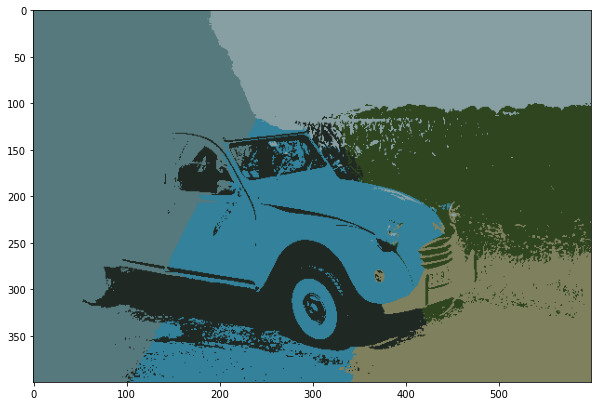

In [5]:
# Nombre de groupes
K = 6 
# Définition des critères d'arret. EPS est le déplacement des centres 
criteresArret = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

RGBPix = image.reshape((-1,3))

# Pour ajouter la position. Groupement de vecteur 1 par 5 plutôt que 1 par 3.
RGBetPosPix= np.zeros((len(RGBPix),5),dtype=np.float32)

# Création d'une matrice de coordonnées.
x = np.linspace(0, image.shape[1]-1,image.shape[1])
y = np.linspace(0, image.shape[0]-1,image.shape[0])
# Pour obtenir les paires de coordonnées possibles.
X,Y = np.meshgrid(x, y)
X= X.reshape((-1),1)
Y= Y.reshape((-1),1)

RGBetPosPix = np.hstack((RGBPix,X,Y))
RGBetPosPix = np.float32(RGBetPosPix)

ret,etiquettes,centres=cv2.kmeans(RGBetPosPix,K,None,criteresArret,1,cv2.KMEANS_RANDOM_CENTERS)

centres = np.uint8(centres)
centressansPos= np.zeros((K,3),dtype=np.uint8) #Pour affichage des classes
for i in range(0,len(centres)):
    centressansPos[i]=centres[i][0:3]

res = centressansPos[etiquettes] #On utilise la couleur de son centre pour représenter chaque segment.
res2 = res.reshape((image.shape))
plt.figure(figsize = (10,10))
plt.imshow(res2)
plt.show()

Cas 2: Sur-segmentation, trop de groupes

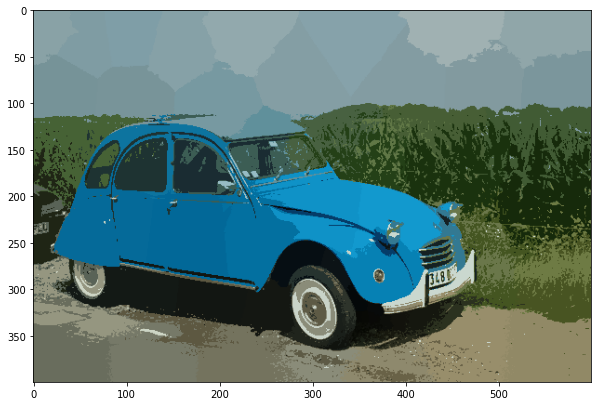

In [6]:
K = 100

ret,etiquettes,centres=cv2.kmeans(RGBetPosPix,K,None,criteresArret,1,cv2.KMEANS_RANDOM_CENTERS)

centres = np.uint8(centres)
centressansPos= np.zeros((K,3),dtype=np.uint8) #Pour affichage des classes
for i in range(0,len(centres)):
    centressansPos[i]=centres[i][0:3]

res = centressansPos[etiquettes]
res2 = res.reshape((image.shape))
plt.figure(figsize = (10,10))
plt.imshow(res2)
plt.show()

Cas intermédiaire. Difficile d'avoir un résultat parfait. Il faudrait améliorer le critère de groupement pour possiblement donner moins d'importance à la position dans l'image. Par exemple, la voiture est trop grosse pour qu'un seul segment la contienne. Les pixels des extrémités dont trop loin un de l'autre. 

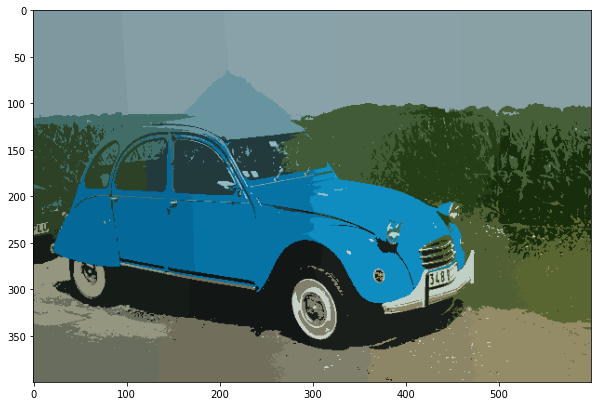

In [7]:
K = 30

# Le 10 après critresArret signifie qu'on fait 10 K-means avec des centres triés au hasard différent
# et qu'on choisit le meilleur résultat basé sur les distances moyennes aux centres (groupes plus homogènes)
ret,etiquettes,centres=cv2.kmeans(RGBetPosPix,K,None,criteresArret,10,cv2.KMEANS_RANDOM_CENTERS)

centres = np.uint8(centres)
centressansPos= np.zeros((K,3),dtype=np.uint8) #Pour affichage des classes
for i in range(0,len(centres)):
    centressansPos[i]=centres[i][0:3]

res = centressansPos[etiquettes]
res2 = res.reshape((image.shape))
plt.figure(figsize = (10,10))
plt.imshow(res2)
plt.show()